# Part 5: LGBM Model Comparison (Outlier vs No Outlier)

### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

from lightgbm.sklearn import LGBMClassifier

from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score, confusion_matrix
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset

Please see the link to know more about the dataset: https://archive.ics.uci.edu/ml/datasets/Parkinson%27s+Disease+Classification#

In [2]:
features = ['tqwt_entropy_log_dec_33', 'tqwt_minvalue_dec_25',
 'tqwt_entropy_shannon_dec_25', 'tqwt_meanvalue_dec_36',
 'tqwt_kurtosisvalue_dec_33', 'tqwt_kurtosisvalue_dec_31',
 'tqwt_maxvalue_dec_17', 'std_9th_delta', 'tqwt_maxvalue_dec_13',
 'tqwt_entropy_log_dec_28', 'tqwt_tkeo_std_dec_19', 'tqwt_meanvalue_dec_22',
 'imf_snr_seo', 'tqwt_meanvalue_dec_5', 'tqwt_kurtosisvalue_dec_27', 'class']

df = pd.read_csv('preprocessed_speech_features.csv', usecols = features)
df.head()

,imf_snr_seo,std_9th_delta,tqwt_entropy_shannon_dec_25,tqwt_entropy_log_dec_28,tqwt_entropy_log_dec_33,tqwt_tkeo_std_dec_19,tqwt_meanvalue_dec_5,tqwt_meanvalue_dec_22,tqwt_meanvalue_dec_36,tqwt_minvalue_dec_25,tqwt_maxvalue_dec_13,tqwt_maxvalue_dec_17,tqwt_kurtosisvalue_dec_27,tqwt_kurtosisvalue_dec_31,tqwt_kurtosisvalue_dec_33,class
0,51.6843,0.047180,53.7314,-3160.3491,-4540.0830,0.063262,-3.980000e-22,-1.250000e-18,-0.014610,-0.24540,0.048924,0.46639,1.5466,4.2105,4.4625,1
1,24.0230,0.039071,35.3951,-3212.9726,-4466.8949,0.050015,0.000000e+00,-1.440000e-19,-0.013605,-0.15110,0.112210,0.34292,1.5530,14.1962,9.5082,1
2,60.0458,0.047357,17.5179,-3724.5248,-4455.2826,0.041622,2.600000e-22,1.520000e-19,-0.014115,-0.24864,0.039886,0.28375,1.5399,10.7458,4.8066,1
3,83.6201,0.024291,-1478.3036,-4965.0071,-2779.8086,0.036978,-7.100000e-21,-2.170000e-19,0.001251,-2.36090,0.273530,0.87739,6.9761,14.0403,4.6857,1
4,102.9371,0.026002,-1511.7055,-5832.5871,-2910.9996,0.028138,5.720000e-21,1.770000e-18,0.000367,-2.28820,0.235860,0.80918,7.8832,5.7621,11.6891,1


### Function for Visualizing Prediction Error

In [3]:
def prediction_error(X_train, y_train, X_test, y_test):
    
    classes = [1, 0]

    from yellowbrick.classifier import ClassPredictionError
    visualizer = ClassPredictionError(LGBMClassifier(random_state = 42), classes=classes)

    # Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)

    # Evaluate the model on the test data
    visualizer.score(X_test, y_test)

    # Draw visualization
    visualizer.show()

## Handling Outliers

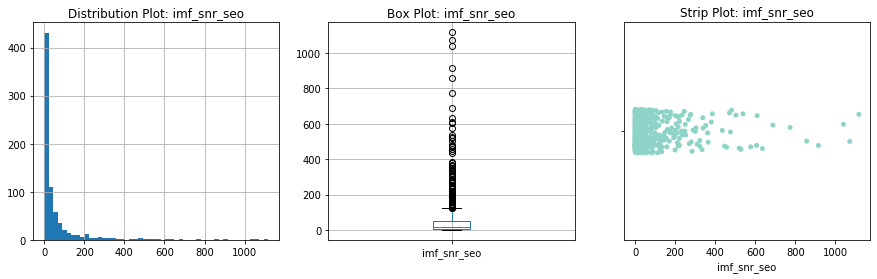

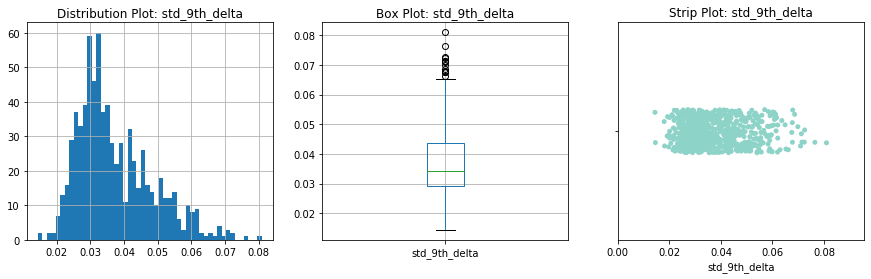

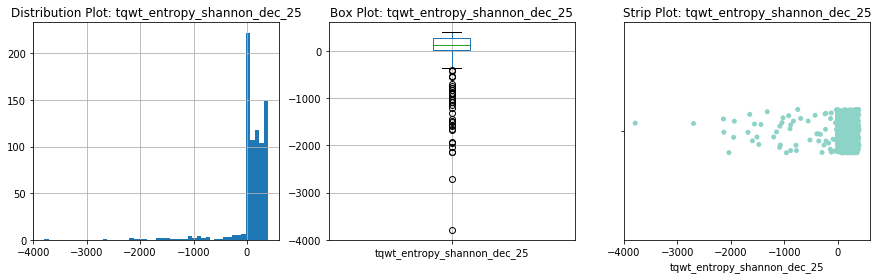

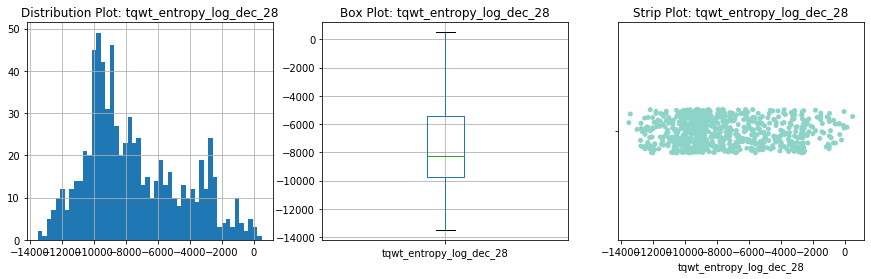

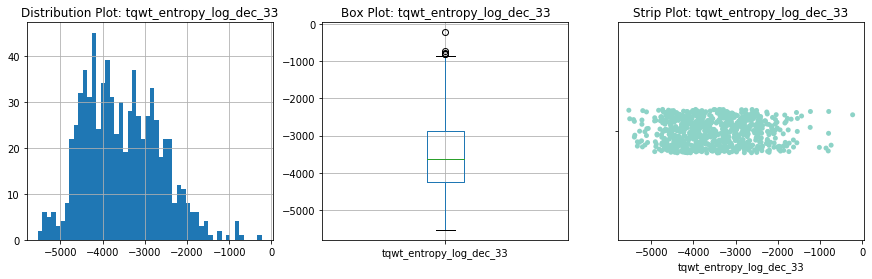

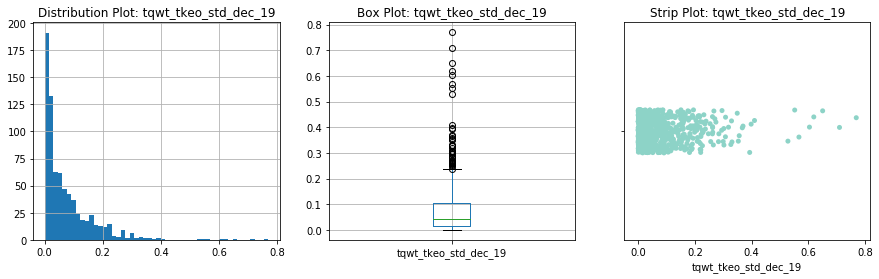

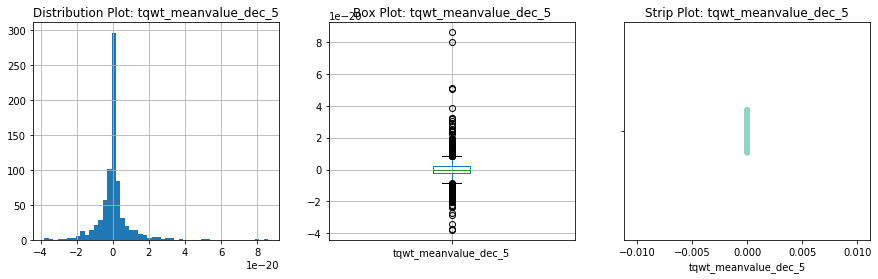

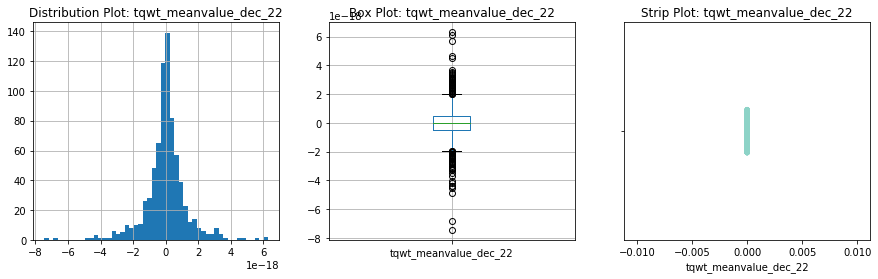

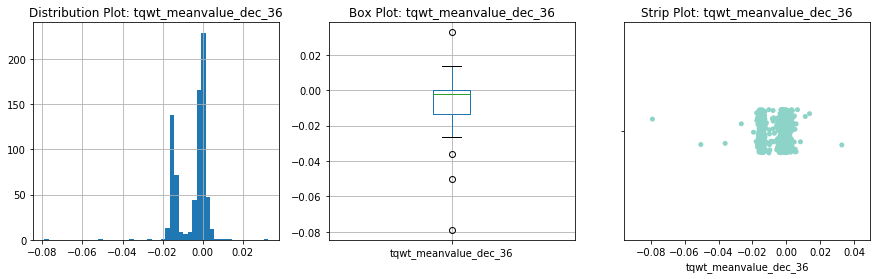

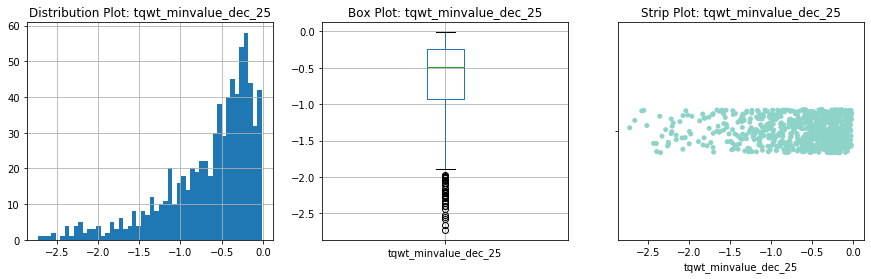

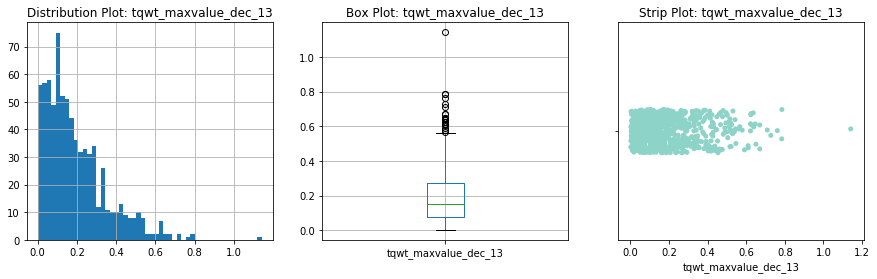

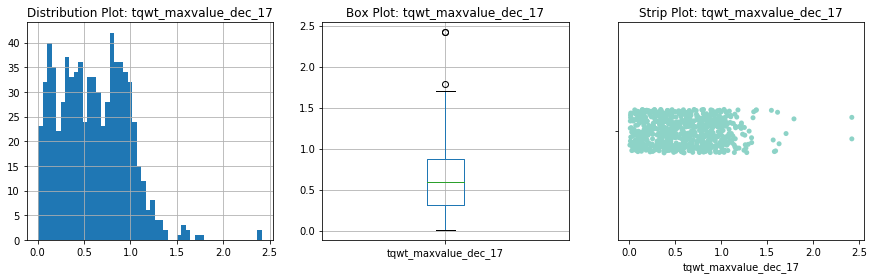

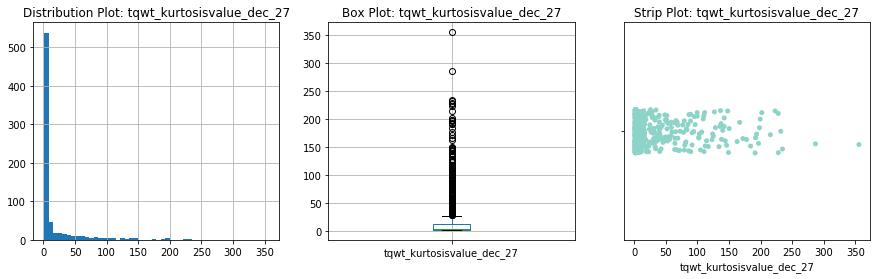

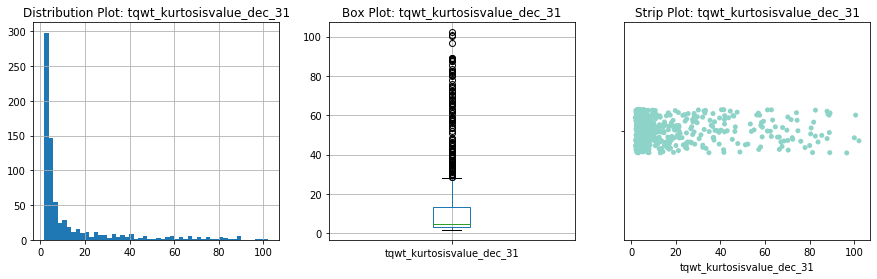

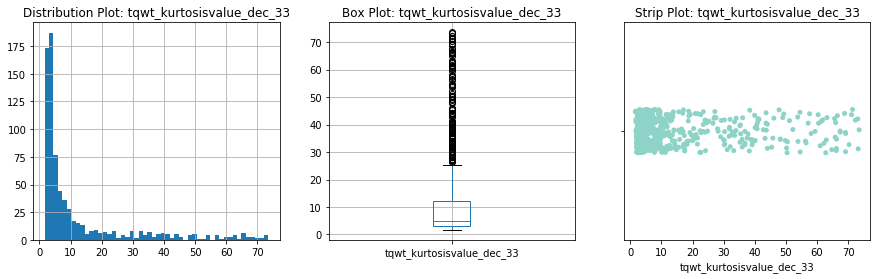

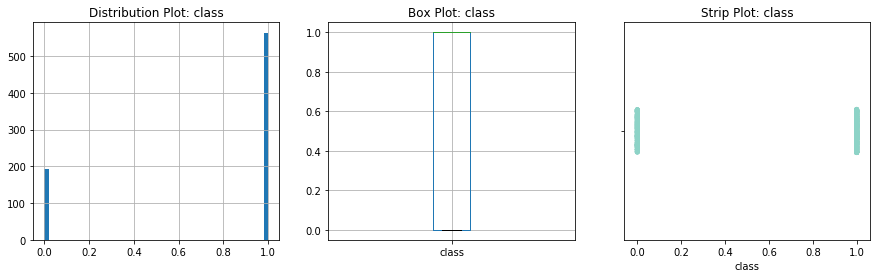

In [4]:
data = df.copy()
cols = data.columns.to_list()

for col in cols:
        
    plt.figure(figsize=(15, 4))
    plt.subplot(1,3,1)
    data[col].hist(bins = 50)
    plt.title('Distribution Plot: {}'.format(col))

    plt.subplot(1,3,2)
    data.boxplot(column = col)
    plt.title('Box Plot: {}'.format(col))

    plt.subplot(1,3,3)
    sns.stripplot(x=data[col], palette='Set3')
    plt.title('Strip Plot: {}'.format(col))
    plt.show()

In [5]:
skewed = ['imf_snr_seo', 'std_9th_delta', 'tqwt_entropy_shannon_dec_25', 'tqwt_tkeo_std_dec_19', 'tqwt_meanvalue_dec_36','tqwt_minvalue_dec_25', 'tqwt_maxvalue_dec_17', 'tqwt_kurtosisvalue_dec_27', 'tqwt_entropy_log_dec_33','tqwt_kurtosisvalue_dec_31']
not_skewed = [ 'tqwt_entropy_log_dec_28', 'tqwt_kurtosisvalue_dec_33', 'tqwt_meanvalue_dec_5',  'tqwt_meanvalue_dec_22',  ]

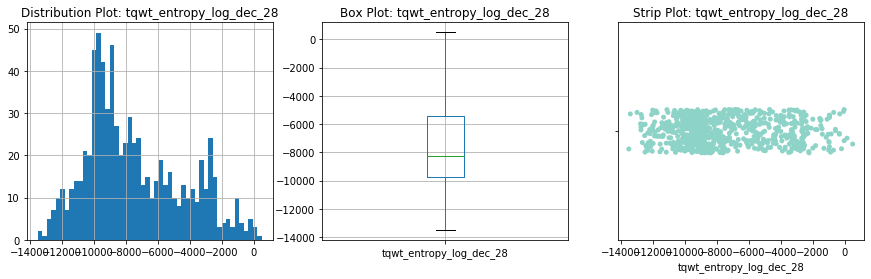

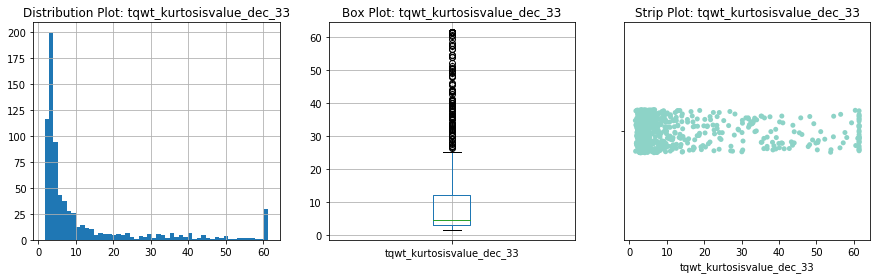

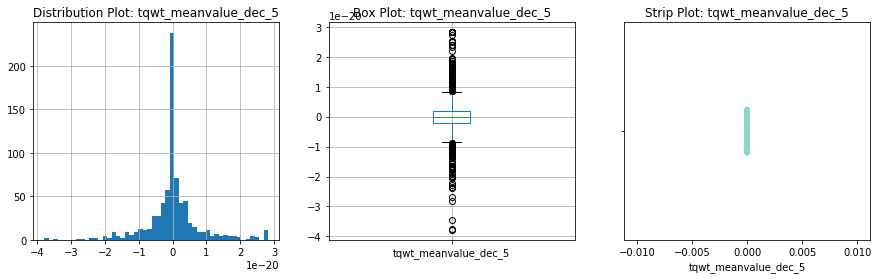

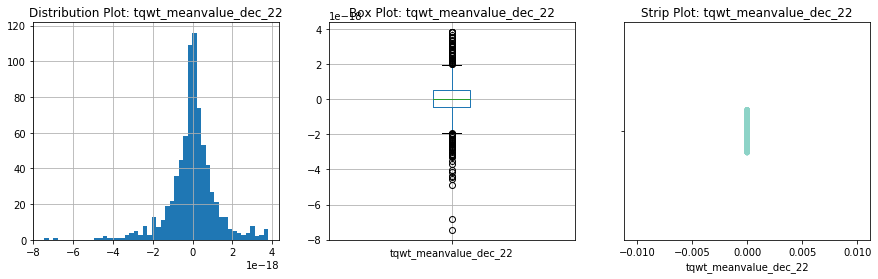

In [6]:
for col in not_skewed: 
    
    uppper_boundary = data[col].mean() + 3* data[col].std()
    lower_boundary = data[col].mean() - 3* data[col].std()

    data.loc[data[col] >= uppper_boundary, col] = uppper_boundary

    plt.figure(figsize=(15, 4))
    plt.subplot(1,3,1)
    data[col].hist(bins = 50)
    plt.title('Distribution Plot: {}'.format(col))

    plt.subplot(1,3,2)
    data.boxplot(column = col)
    plt.title('Box Plot: {}'.format(col))

    plt.subplot(1,3,3)
    sns.stripplot(x=data[col], palette='Set3')
    plt.title('Strip Plot: {}'.format(col))
    plt.show()

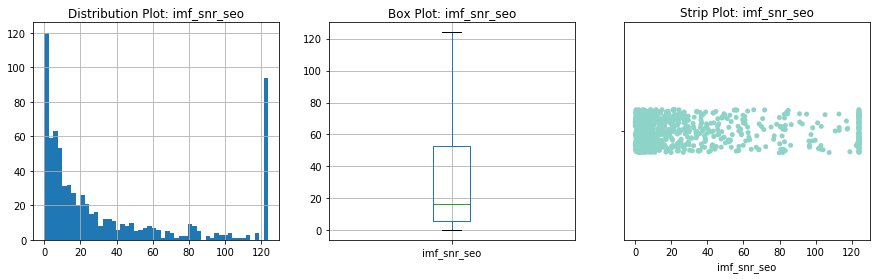

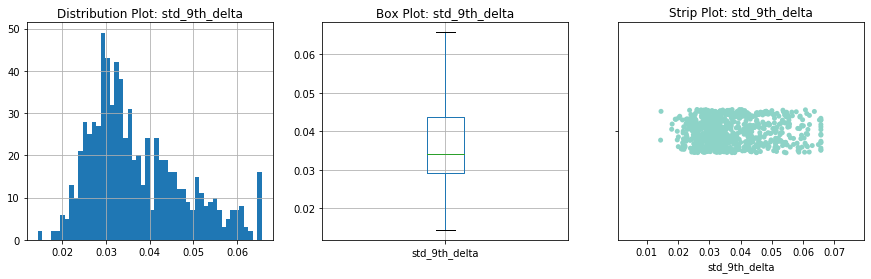

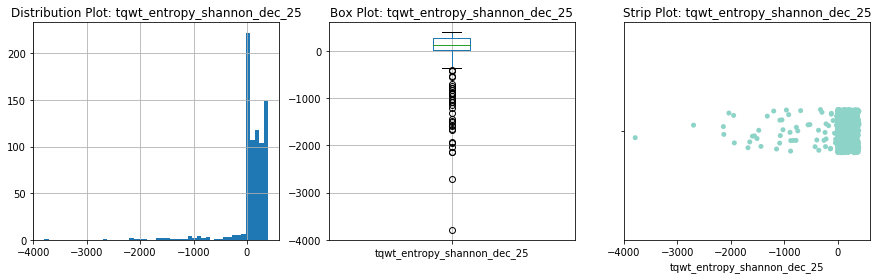

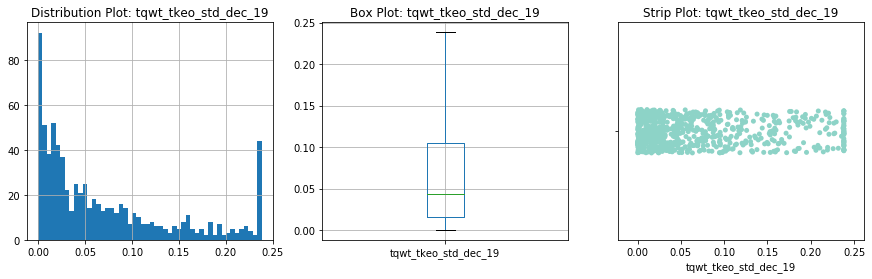

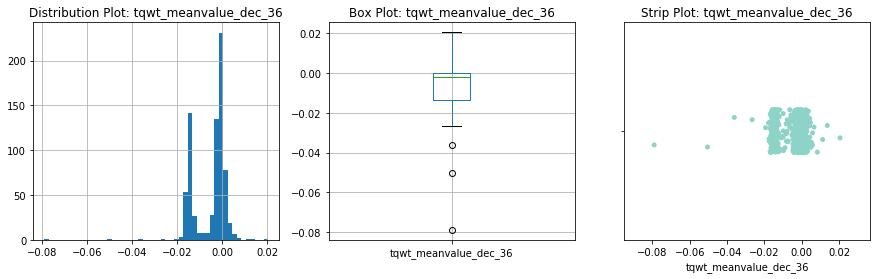

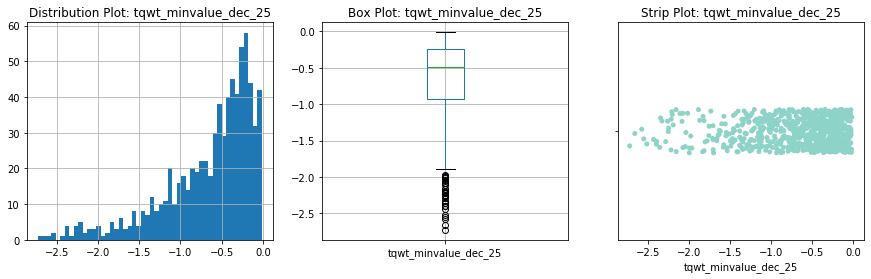

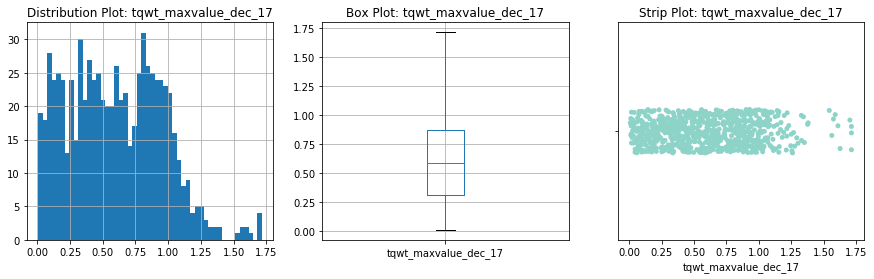

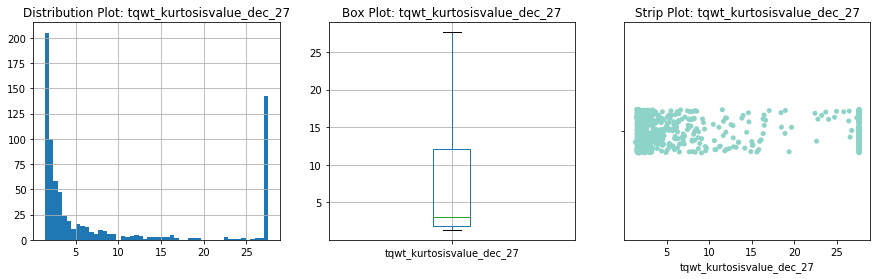

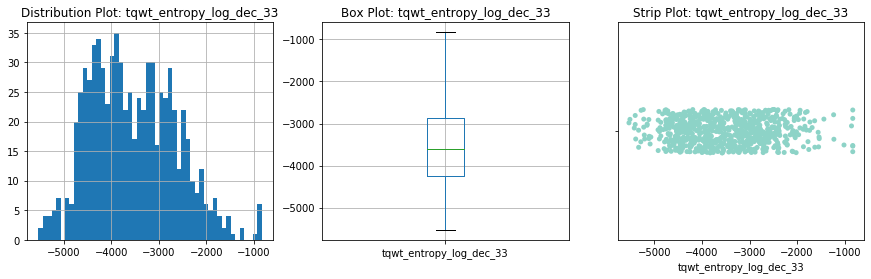

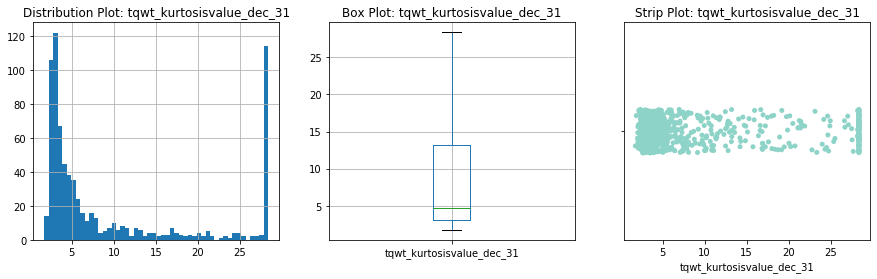

In [7]:
for col in skewed:  
        
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

    lower_bridge = data[col].quantile(0.25) - (IQR*1.5)
    upper_bridge = data[col].quantile(0.75) + (IQR*1.5)

    data.loc[data[col]>= upper_bridge, col] = upper_bridge

    plt.figure(figsize=(15, 4))
    plt.subplot(1,3,1)
    data[col].hist(bins = 50)
    plt.title('Distribution Plot: {}'.format(col))

    plt.subplot(1,3,2)
    data.boxplot(column = col)
    plt.title('Box Plot: {}'.format(col))

    plt.subplot(1,3,3)
    sns.stripplot(x=data[col], palette='Set3')
    plt.title('Strip Plot: {}'.format(col))
    plt.show()

### Split Input and Traget Variables

In [8]:
X = df.drop('class', axis = 1) 
y = df['class']

X_data = data.drop('class', axis = 1) 
y_data = data['class']

### Train Test Split

In [9]:
# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =0)
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data, test_size=0.18, random_state =0)

print("Original shape of dataset: {}".format(df.shape))         # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape))      # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape))        # shape of testing dataset after split

Original shape of dataset: (756, 16)
Shape of training dataset: (604, 15)
Shape of testing dataset: (152, 15)


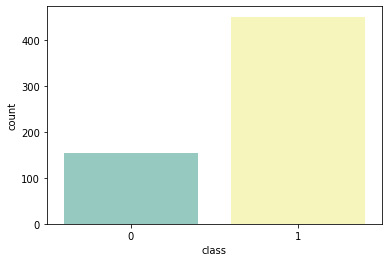

In [10]:
sns.countplot(y_train, palette='Set3')

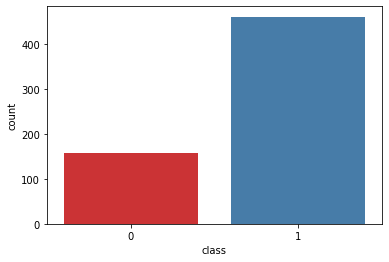

In [11]:
sns.countplot(y_train_data, palette='Set1')

## Oversampling the minor class

In [12]:
def ovsample(X_train, y_train):
    
    # 'resample' is located under sklearn.utils
    from sklearn.utils import resample
    
    # concatenate training data back together
    train_data = pd.concat([X_train, y_train], axis = 1)

    # separate minority and majority class
    not_par = train_data[train_data['class']==0]
    Parkinsons = train_data[train_data['class']==1]

    # we are oversampling the minority class to match the number of majority classs
    Parkinsons_oversampled = resample(not_par,
                           replace = True, # Sample with replacement
                           n_samples = len(Parkinsons), # Match number in majority class
                           random_state=27)

    # combine majority and upsampled minority
    oversampled = pd.concat([Parkinsons, Parkinsons_oversampled])

    X_train_ov = oversampled.drop('class', axis = 1) 
    y_train_ov = oversampled['class']
    
    return X_train_ov, y_train_ov

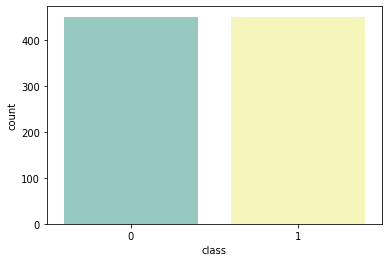

In [13]:
X_train, y_train = ovsample(X_train, y_train)
X_train_data, y_train_data = ovsample(X_train_data, y_train_data)
sns.countplot(y_train, palette='Set3')

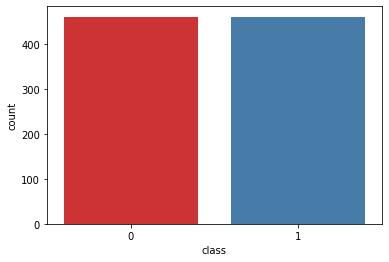

In [14]:
sns.countplot(y_train_data, palette='Set1')

## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train_data = sc.fit_transform(X_train_data)
X_test_data = sc.transform(X_test_data)

## Final Model (with outliers)

Recall Score: 0.9561
Macro Average of Recall Score: 0.7939
Weighted Average of Recall Score: 0.875
------------------------------------------------------
Macro Average of Precision Score: 0.8569
Weighted Average of Precision Score: 0.8715
------------------------------------------------------
Macro Average of F1 Score: 0.8181
Weighted Average of F1 Score: 0.869
.
Accuracy Score: 0.875


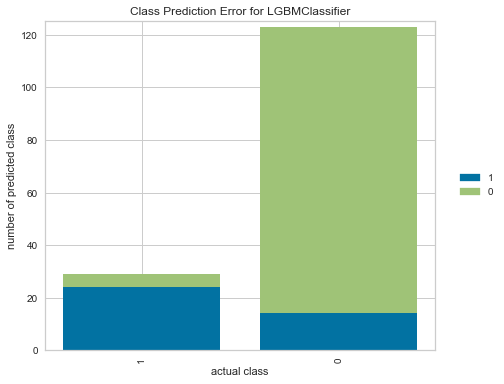

In [16]:
model = LGBMClassifier(random_state = 42)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
y_hat_train = model.predict(X_train)

rec = recall_score(y_test, y_hat)
print ("Recall Score:", round(rec, 4))

rec_mac = recall_score(y_test, y_hat, average = 'macro')
print ("Macro Average of Recall Score:", round(rec_mac, 4))

rec_wei = recall_score(y_test, y_hat, average = 'weighted')
print ("Weighted Average of Recall Score:", round(rec_wei, 4))

print ('------------------------------------------------------')

prec_mac = precision_score(y_test, y_hat, average = 'macro')
print ("Macro Average of Precision Score:", round(prec_mac, 4))

prec_wei = precision_score(y_test, y_hat, average = 'weighted')
print ("Weighted Average of Precision Score:", round(prec_wei, 4))

print ('------------------------------------------------------')

f1_mac = f1_score(y_test, y_hat, average = 'macro')
print ("Macro Average of F1 Score:", round(f1_mac, 4))

f1_wei = f1_score(y_test, y_hat, average = 'weighted')
print ("Weighted Average of F1 Score:", round(f1_wei, 4))

print('.')

acc = accuracy_score(y_test, y_hat)
print ("Accuracy Score:", round(acc, 4))

prediction_error(X_train, y_train, X_test, y_test)

In [17]:
acc_train = metrics.accuracy_score(y_train, y_hat_train)
print ("Accuracy Score of Train Set:", acc_train)
    
acc_test = metrics.accuracy_score(y_test, y_hat)
print ("Accuracy Score of Test Set:", acc_test)
    
print ('.')
    
f1_train = metrics.f1_score(y_train, y_hat_train, average = 'macro')
print ("F1 Score of Train Set:", f1_train)
    
f1_test = metrics.f1_score(y_test, y_hat, average = 'macro')
print ("F1 Score of Test Set:", f1_test)

Accuracy Score of Train Set: 1.0
Accuracy Score of Test Set: 0.875
.
F1 Score of Train Set: 1.0
F1 Score of Test Set: 0.8181245670382264


## Final Model (without outliers)

Recall Score: 0.9126
Macro Average of Recall Score: 0.8093
Weighted Average of Recall Score: 0.8613
------------------------------------------------------
Macro Average of Precision Score: 0.8156
Weighted Average of Precision Score: 0.86
------------------------------------------------------
Macro Average of F1 Score: 0.8123
Weighted Average of F1 Score: 0.8606
.
Accuracy Score: 0.8613


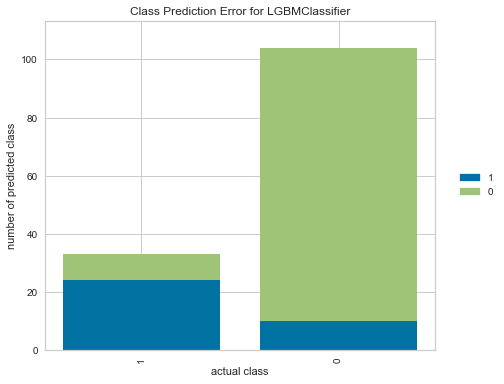

In [18]:
model = LGBMClassifier(random_state = 42)
model.fit(X_train_data, y_train_data)
y_hat_data = model.predict(X_test_data)
y_hat_train_data = model.predict(X_train_data)

rec = recall_score(y_test_data, y_hat_data)
print ("Recall Score:", round(rec, 4))

rec_mac = recall_score(y_test_data, y_hat_data, average = 'macro')
print ("Macro Average of Recall Score:", round(rec_mac, 4))

rec_wei = recall_score(y_test_data, y_hat_data, average = 'weighted')
print ("Weighted Average of Recall Score:", round(rec_wei, 4))

print ('------------------------------------------------------')

prec_mac = precision_score(y_test_data, y_hat_data, average = 'macro')
print ("Macro Average of Precision Score:", round(prec_mac, 4))

prec_wei = precision_score(y_test_data, y_hat_data, average = 'weighted')
print ("Weighted Average of Precision Score:", round(prec_wei, 4))

print ('------------------------------------------------------')

f1_mac = f1_score(y_test_data, y_hat_data, average = 'macro')
print ("Macro Average of F1 Score:", round(f1_mac, 4))

f1_wei = f1_score(y_test_data, y_hat_data, average = 'weighted')
print ("Weighted Average of F1 Score:", round(f1_wei, 4))

print('.')

acc = accuracy_score(y_test_data, y_hat_data)
print ("Accuracy Score:", round(acc, 4))

prediction_error(X_train_data, y_train_data, X_test_data, y_test_data)

In [19]:
acc_train_data = metrics.accuracy_score(y_train_data, y_hat_train_data)
print ("Accuracy Score of Train Set:", acc_train_data)
    
acc_test_data = metrics.accuracy_score(y_test_data, y_hat_data)
print ("Accuracy Score of Test Set:", acc_test_data)
    
print ('.')
    
f1_train_data = metrics.f1_score(y_train_data, y_hat_train_data, average = 'macro')
print ("F1 Score of Train Set:", f1_train_data)
    
f1_test_data = metrics.f1_score(y_test_data, y_hat_data, average = 'macro')
print ("F1 Score of Test Set:", f1_test_data)

Accuracy Score of Train Set: 1.0
Accuracy Score of Test Set: 0.8613138686131386
.
F1 Score of Train Set: 1.0
F1 Score of Test Set: 0.8123152354171175


## Conclusion

### We will keep the features unchanged.